https://www.kaggle.com/datasets/marshuu/crimes-in-uk-2023

In [189]:
import pandas as pd
import glob, math

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')


# Get Data

In [190]:
def findFiles(f): return glob.glob(f, recursive=True)

In [191]:
df_files = findFiles('data/Crimes-in-UK-2023/*.csv')


In [192]:
df_files

['data/Crimes-in-UK-2023/2023-01-merseyside-street.csv',
 'data/Crimes-in-UK-2023/2023-01-bedfordshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-thames-valley-street.csv',
 'data/Crimes-in-UK-2023/2023-01-suffolk-street.csv',
 'data/Crimes-in-UK-2023/2023-01-surrey-street.csv',
 'data/Crimes-in-UK-2023/2023-01-avon-and-somerset-street.csv',
 'data/Crimes-in-UK-2023/2023-01-essex-street.csv',
 'data/Crimes-in-UK-2023/2023-01-northamptonshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-dorset-street.csv',
 'data/Crimes-in-UK-2023/2023-01-lincolnshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-south-wales-street.csv',
 'data/Crimes-in-UK-2023/2023-01-west-yorkshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-lancashire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-cambridgeshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-warwickshire-street.csv',
 'data/Crimes-in-UK-2023/2023-01-north-wales-street.csv',
 'data/Crimes-in-UK-2023/2023-01-derbyshire-street.csv',
 'data/Crimes-i

In [193]:
# Create an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through each CSV file and concatenate it with the existing data
for file in df_files:
    df = pd.read_csv(file)
    concatenated_df = pd.concat([concatenated_df, df])


In [194]:
concatenated_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-01,Merseyside Police,Merseyside Police,-2.741761,53.395028,On or near Northumberland Road,E01012393,Halton 001B,Anti-social behaviour,NaN,NaN
1,33a02c062cc15eb6c60bc9094438dabc508b05fcf96091...,2023-01,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,Investigation complete; no suspect identified,NaN
2,749c3356afec9cb5add72f85e309a8f68bc1ddc53621eb...,2023-01,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,1657303212020146f40259488fb0fb57c109dc63c0d248...,2023-01,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,Under investigation,NaN
4,f594eab633ff0548e475edab5bde31cae76df532a223f6...,2023-01,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5155,27ce5bcd600240e8b768d788953e2efa2fbaaf9f676cc2...,2023-01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
5156,bec026b440956d06ce7142258be4a86cf7f6788ba34aed...,2023-01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Unable to prosecute suspect,NaN
5157,d85fb164eb5079c889f0ec929c0f80075646389f266fa7...,2023-01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Unable to prosecute suspect,NaN
5158,dd74f6a64850296d8c76087913b1e2354c5a98c3b5432f...,2023-01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [195]:
concatenated_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [196]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478347 entries, 0 to 5159
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               413159 non-null  object 
 1   Month                  478347 non-null  object 
 2   Reported by            478347 non-null  object 
 3   Falls within           478347 non-null  object 
 4   Longitude              470741 non-null  float64
 5   Latitude               470741 non-null  float64
 6   Location               478347 non-null  object 
 7   LSOA code              458368 non-null  object 
 8   LSOA name              458368 non-null  object 
 9   Crime type             478347 non-null  object 
 10  Last outcome category  404512 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 47.4+ MB


Based on the information provided, it is possible to model the dataset.

Some potential modeling approaches for this dataset could include:

`Predicting crime rates`: The dataset contains information about the type and location of crimes reported, as well as the time of the report. One potential modeling task could be to predict the crime rate for a given area or time period based on historical data.

    Predicting crime rates:

    - Month: The month and year of the report could be useful for detecting seasonal patterns in crime activity.
    - Latitude and Longitude: The geographical location of the crime could be useful for identifying crime hotspots and areas with higher crime rates.
    - Crime type: The type of crime reported could be a useful predictor for crime rate.


`Crime type classification`: Another potential modeling task could be to classify crimes into different categories based on the information provided in the dataset, such as the location and type of the crime. This could be useful for identifying patterns or hotspots in crime activity.

    Crime type classification:

    - Crime type: The type of crime reported is a key feature for this task.
    - Latitude and Longitude: The geographical location of the crime could be useful for identifying crime hotspots and patterns in different types of crime.
    - Month: The month and year could be useful for detecting seasonal patterns in different types of crime.


`Outcome prediction`: The Last outcome category column in the dataset contains information about the outcome of the reported crime. A potential modeling task could be to predict the likely outcome of a reported crime based on the information provided in the dataset, such as the type of crime, location, and time of report.

    Outcome prediction:

    - Crime type: The type of crime reported could be a useful predictor for the outcome of the report.
    - Latitude and Longitude: The geographical location of the crime could be useful for identifying patterns in the outcome of reports in different areas.
    -  Last outcome category: This column contains the outcome of the reported crime and could be used as the target variable for the outcome prediction task.
    
    

I intend to perform crime type classification, which involves developing a machine learning model that can accurately predict the type of crime based on various features such as the location, month, and other information available in the dataset.

In [197]:
concatenated_df['Crime type'].unique()

array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Drugs', 'Robbery', 'Violence and sexual offences', 'Other theft',
       'Public order', 'Vehicle crime', 'Shoplifting', 'Other crime',
       'Bicycle theft', 'Possession of weapons', 'Theft from the person'],
      dtype=object)

In [198]:
%%time
concatenated_df['Crime type'].unique()

CPU times: user 38.8 ms, sys: 2.78 ms, total: 41.6 ms
Wall time: 40 ms


array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Drugs', 'Robbery', 'Violence and sexual offences', 'Other theft',
       'Public order', 'Vehicle crime', 'Shoplifting', 'Other crime',
       'Bicycle theft', 'Possession of weapons', 'Theft from the person'],
      dtype=object)

# Data Preprocessing

In [199]:
# make a copy of the original dataset
crime_df = concatenated_df.copy()


check for missing values

In [200]:
print(crime_df.isnull().sum())

Crime ID                  65188
Month                         0
Reported by                   0
Falls within                  0
Longitude                  7606
Latitude                   7606
Location                      0
LSOA code                 19979
LSOA name                 19979
Crime type                    0
Last outcome category     73835
Context                  478347
dtype: int64


`Discussion`

- The dataset contains information on crimes reported in the UK.

- The Crime ID column has 65188 unique values, which likely represent individual crimes. 

- There are no missing values in the Reported by and Falls within columns, which suggest that all crimes were reported and are within the scope of the dataset. 

- However, there are missing values in some other columns. For example, there are 7606 missing values in the Longitude and Latitude columns, which could indicate that the location of the crime was not recorded or that there was an error in the data. 

- There are also missing values in the LSOA code and LSOA name columns, which may be due to incomplete or inaccurate data. 

- The Crime type column contains no missing values, which suggests that all crimes were classified according to their type. 

- The Last outcome category column has 73835 missing values, which could indicate that the outcome of the crime was not recorded or that there was an error in the data.

- Finally, the Context column has no data and may be removed from the dataset as it provides no value for analysis. 

These missing values and inconsistencies will need to be addressed before the data can be used for analysis or modeling purposes.

Clean up column names

In [201]:
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False).str.replace('-', '_', regex=False).str.replace('(', '', regex=False).str.replace(')', '', regex=False)


In [202]:
crime_df.columns

Index(['crime_id', 'month', 'reported_by', 'falls_within', 'longitude',
       'latitude', 'location', 'lsoa_code', 'lsoa_name', 'crime_type',
       'last_outcome_category', 'context'],
      dtype='object')

Remove unnecessary columns

In [203]:
crime_df = crime_df.drop(['context','crime_id'], axis=1)

In [204]:
crime_df.head()

,month,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category
0,2023-01,Merseyside Police,Merseyside Police,-2.741761,53.395028,On or near Northumberland Road,E01012393,Halton 001B,Anti-social behaviour,NaN
1,2023-01,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,Investigation complete; no suspect identified
2,2023-01,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified
3,2023-01,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,Under investigation
4,2023-01,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation


Address outliers

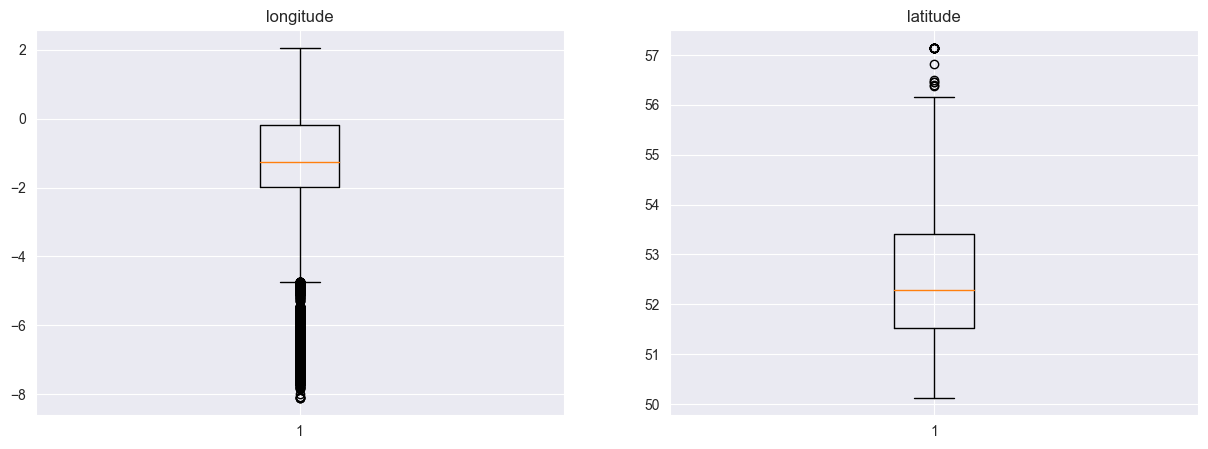

In [205]:

# Select numerical columns
numerical_cols = ['longitude', 'latitude']

# Create boxplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(crime_df[col].dropna())
    axes[i].set_title(col)
plt.show()


`Discussion`

In the case of the longitude box plot, we can see that there are a lot of data points below -4.5, it means that the majority of the data is clustered around that value. This could indicate that the crime data is concentrated in a particular region of the UK, such as a city or urban area.

In the case of the latitude box plot, we can see that there are a few points above 57, it means that there are a few outliers that are far away from the rest of the data. This could be due to a number of reasons, such as errors in the data, or it could indicate that there are a few areas in the UK that have a significantly higher crime rate compared to the rest of the country. 

Further investigation would be necessary to determine the cause of these outliers.

In [206]:
import numpy as np

In [207]:
# Check for outliers
z = np.abs(crime_df['longitude'] - crime_df['longitude'].mean()) / crime_df['longitude'].std()
crime_df = crime_df[z < 3]


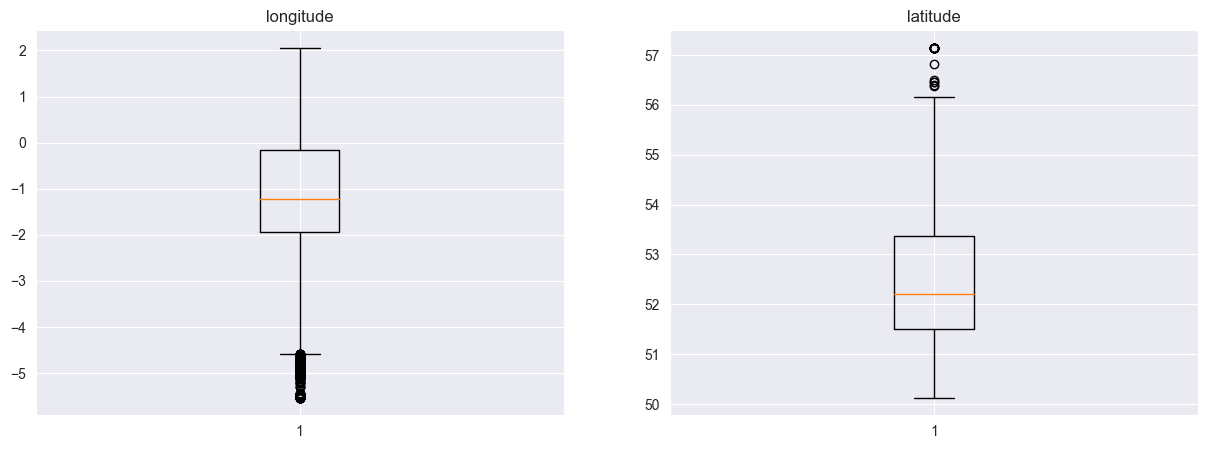

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(crime_df[col].dropna())
    axes[i].set_title(col)

plt.show()


`Discussion`

The fact that only the latitude column had outliers identified and removed using the interquartile range (IQR) method while the longitude column did not change could mean that the data in the longitude column does not contain any significant outliers or that the IQR method is not the best approach to identify outliers in that column. It is possible that there are other outliers present in the longitude column that were not identified by the IQR method and therefore, another approach may need to be considered to identify and address these outliers.

If the IQR method did not identify and remove all outliers of the longitude, using the z-score method can be another option. 

Feature engineering

In [213]:
print(crime_df['month'].dtype)


object


Convert data types

In [214]:
crime_df['dates'] = pd.to_datetime(crime_df['month'])
crime_df.drop(['month'], axis=1, inplace=True)#.head()

Drop nan's in rows

In [215]:
crime_df.dropna(inplace=True)

In [216]:
# Check for NaN values in each column; after dropping
print(crime_df.isnull().sum())


reported_by              0
falls_within             0
longitude                0
latitude                 0
location                 0
lsoa_code                0
lsoa_name                0
crime_type               0
last_outcome_category    0
dates                    0
dtype: int64


In [217]:
crime_df

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,dates
1,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,Investigation complete; no suspect identified,2023-01-01
2,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,2023-01-01
3,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01
4,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01
5,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01
...,...,...,...,...,...,...,...,...,...,...
4589,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181394,51.846238,On or near Bowthorpe Drive,E01022446,Tewkesbury 009E,Violence and sexual offences,Under investigation,2023-01-01
4590,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181414,51.844072,On or near Westonbirt Close,E01022446,Tewkesbury 009E,Violence and sexual offences,Unable to prosecute suspect,2023-01-01
4591,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.184028,51.844265,On or near Hazel Way,E01022446,Tewkesbury 009E,Violence and sexual offences,Under investigation,2023-01-01
4592,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.177937,51.853014,On or near Gransmoor Grange,E01022446,Tewkesbury 009E,Other crime,Unable to prosecute suspect,2023-01-01


Save processed data to a new file


In [218]:
crime_df.to_csv('data/processed_crime_data.csv', index=False)

# Exploratory data analysis (EDA)

In [219]:
import seaborn as sns

In [220]:
crime_df.describe()

,longitude,latitude
count,397205.000000,397205.000000
mean,-1.172625,52.425051
std,1.172002,1.104152
min,-5.525005,50.127894
25%,-1.922461,51.511939
50%,-1.237882,52.270072
75%,-0.173256,53.373822
max,1.760357,55.790238


`Discussion`

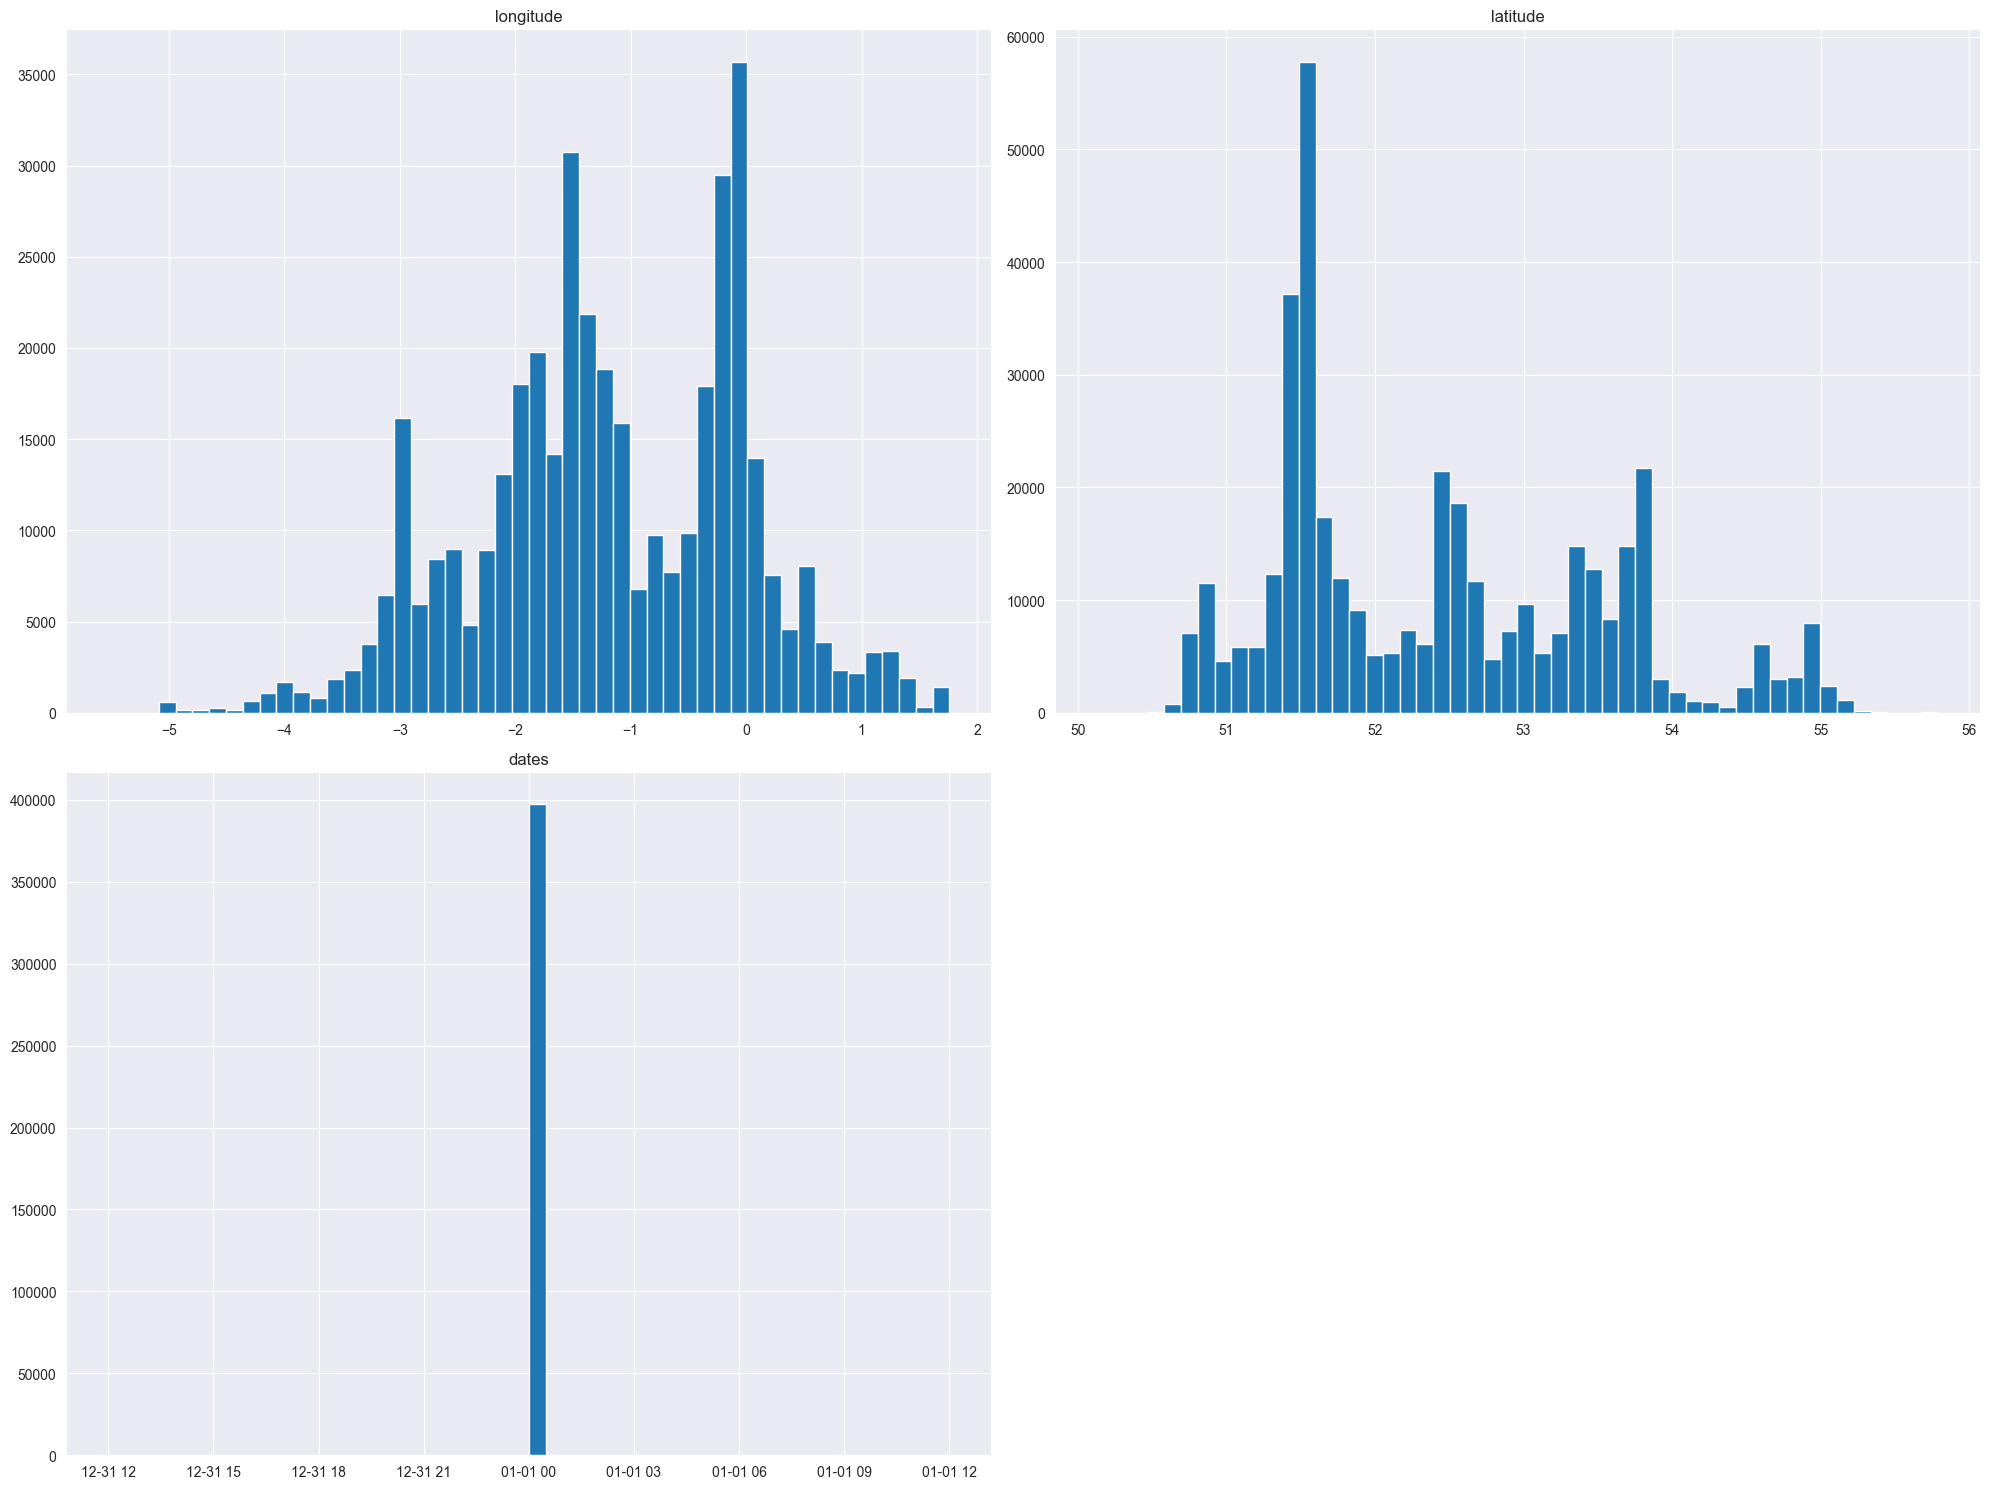

In [221]:
crime_df.hist(bins=50, figsize=(20,15)) 
plt.tight_layout()
plt.show()

### Create a Test Set

Stratified sampling is a technique for ensuring that all subgroups of a population are represented proportionally in a sample. This can be useful for EDA when you want to make sure that your analysis is representative of the entire population.

In our case, we can stratify the entire dataset by using all of the columns. This will ensure that all of the data is represented proportionally in the sample, regardless of the column. This can be helpful for EDA when you want to get a more nuanced understanding of the data and how it varies by different factors. For example, you could stratify the data by location to understand how crime rates vary by location. You could also stratify the data by time of day to understand how crime rates vary by time of day.

By stratifying the data by all of the columns, we can get a more complete understanding of the data and how it varies by different factors. This information can be used to develop targeted crime prevention strategies.

In [222]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Create a stratified sample
for train_index, test_index in sss.split(crime_df, crime_df['crime_type']):
    strat_train_set = crime_df.iloc[train_index]
    strat_test_set = crime_df.iloc[test_index]


Lets use the `strat_train_set` for our EDA.

In [223]:
strat_train_set['crime_type'].unique()

array(['Public order', 'Shoplifting', 'Bicycle theft',
       'Criminal damage and arson', 'Violence and sexual offences',
       'Vehicle crime', 'Other crime', 'Other theft',
       'Theft from the person', 'Robbery', 'Burglary', 'Drugs',
       'Possession of weapons'], dtype=object)

In [224]:
strat_train_set

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,dates
7072,Lancashire Constabulary,Lancashire Constabulary,-2.799407,54.093991,On or near Pinewood Avenue,E01025160,Lancaster 003E,Public order,Under investigation,2023-01-01
3544,Lancashire Constabulary,Lancashire Constabulary,-3.019497,53.794279,On or near Holbeck Avenue,E01012697,Blackpool 016D,Shoplifting,Under investigation,2023-01-01
12083,Northumbria Police,Northumbria Police,-1.372043,54.914281,On or near Liberty Way,E01008791,Sunderland 006F,Bicycle theft,Under investigation,2023-01-01
747,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.074495,51.898763,On or near Rodney Road,E01022117,Cheltenham 009B,Criminal damage and arson,Investigation complete; no suspect identified,2023-01-01
1491,Northumbria Police,Northumbria Police,-1.786022,54.936158,On or near Sycamore Court,E01008196,Gateshead 024D,Violence and sexual offences,Under investigation,2023-01-01
...,...,...,...,...,...,...,...,...,...,...
2804,Bedfordshire Police,Bedfordshire Police,-0.472836,51.915442,On or near Daisy Place,E01015804,Luton 002C,Violence and sexual offences,Under investigation,2023-01-01
8762,West Mercia Police,West Mercia Police,-2.249923,52.388314,On or near Bull Ring,E01032450,Wyre Forest 004D,Violence and sexual offences,Unable to prosecute suspect,2023-01-01
2994,Cumbria Constabulary,Cumbria Constabulary,-2.896522,54.373137,On or near School Knott Close,E01019399,South Lakeland 002E,Criminal damage and arson,Unable to prosecute suspect,2023-01-01
10935,Lancashire Constabulary,Lancashire Constabulary,-2.246591,53.720407,On or near B6238,E01025393,Rossendale 001D,Violence and sexual offences,Under investigation,2023-01-01


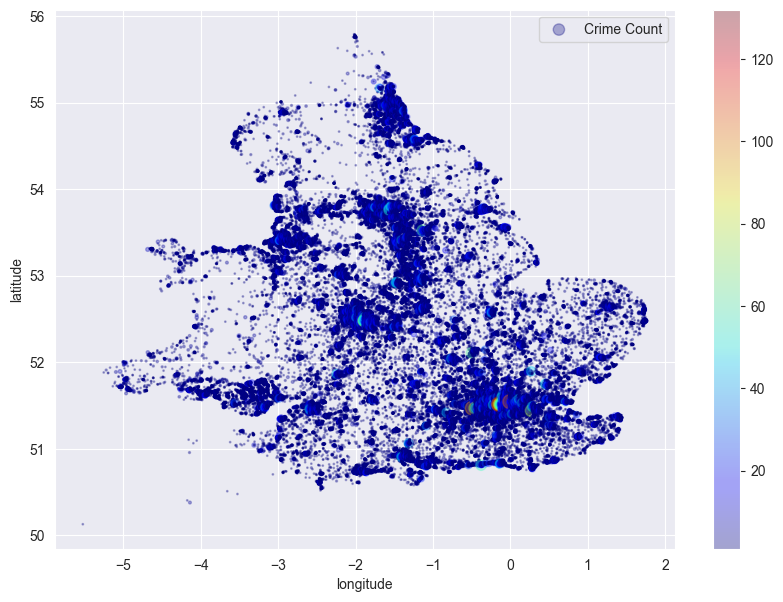

In [225]:
crime_counts = strat_train_set.groupby(['longitude', 'latitude']).size().reset_index(name='crime_count')
crime_counts.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
        s=crime_counts['crime_count'],
        c=crime_counts['crime_count'], cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(10,7), label="Crime Count")
plt.legend()


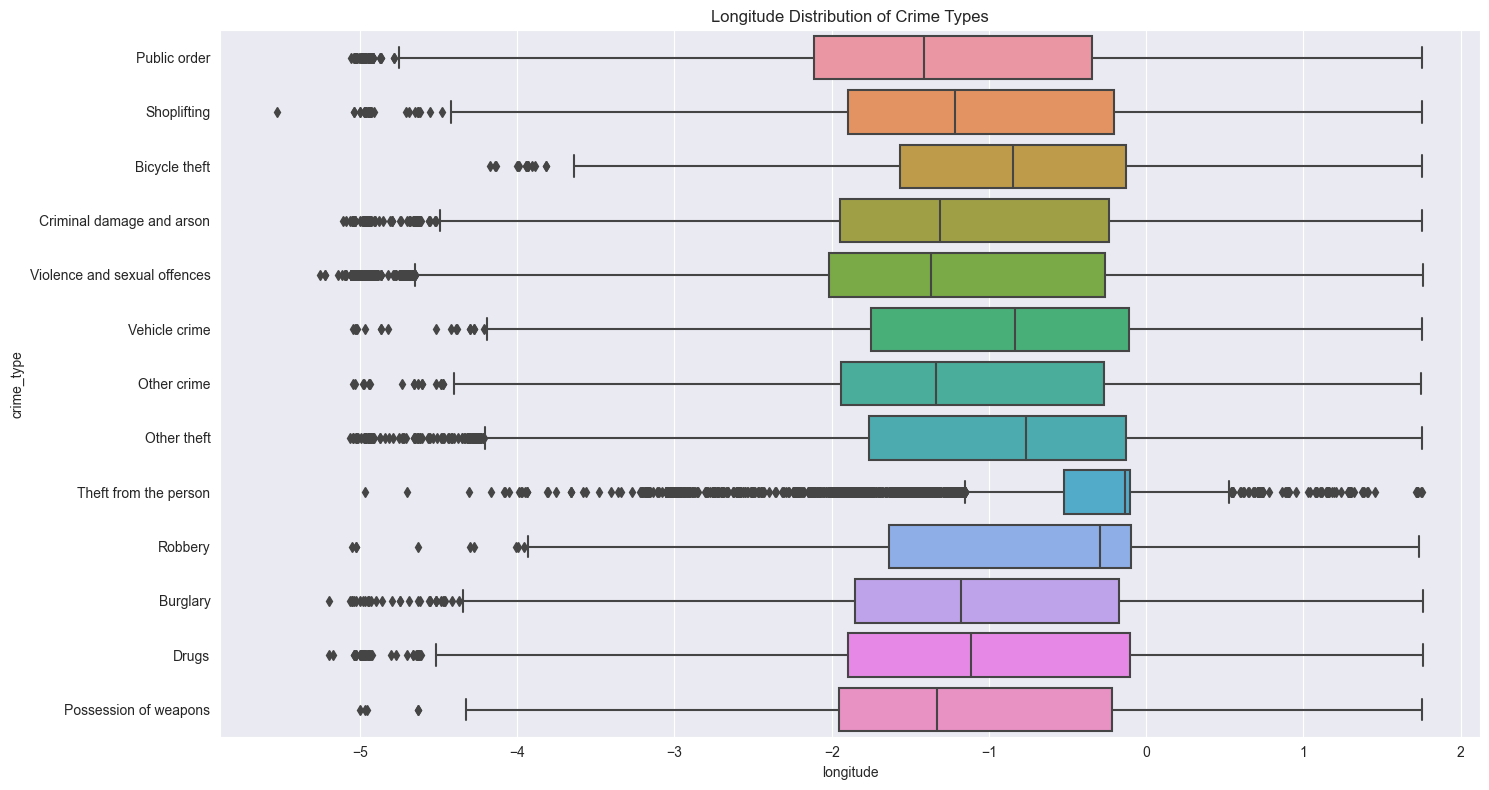

In [227]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='longitude', y='crime_type', data=strat_train_set)
plt.title('Longitude Distribution of Crime Types')
plt.tight_layout()
plt.show()

`Discussion`

The boxplot demonstrates that for all crime types, the median longitude value is comparable. For some crime types, such as stealing from someone or shoplifting, the range of longitude values is greater. This shows that certain areas of London may be more likely than others to experience these crimes.

The outliers in the boxplot are also interesting. There are a few data points that fall outside of the IQR for all crime types. These data points may represent crime incidents that occurred in unusual locations


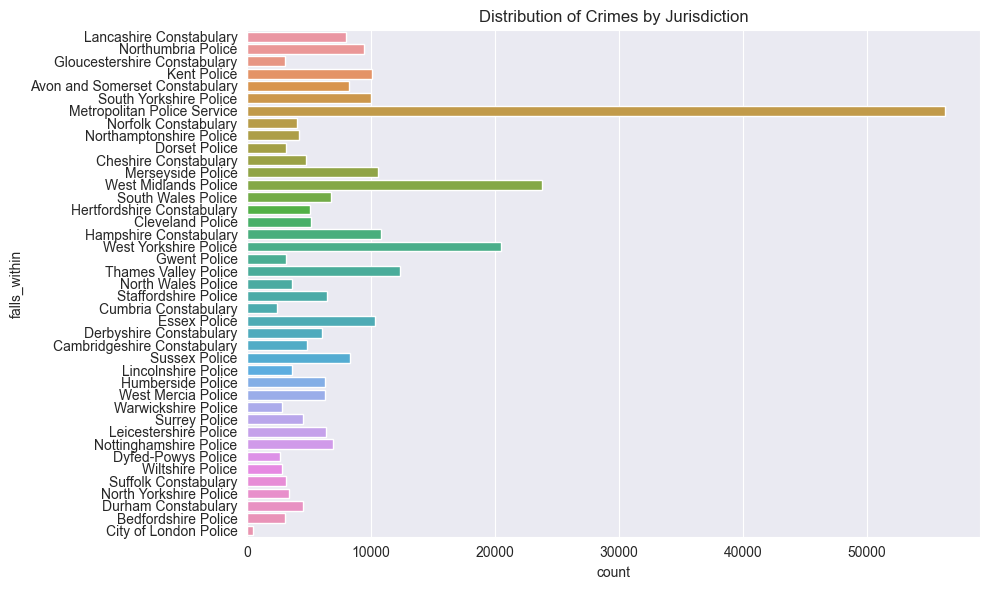

In [229]:
# Distribution of crimes within the jurisdiction of each police force
plt.figure(figsize=(10, 6))
sns.countplot(y='falls_within', data=strat_train_set)
# plt.xticks(rotation=90)
plt.title('Distribution of Crimes by Jurisdiction')
plt.tight_layout()
plt.show()


`Discussion`

The countplot reveals that the Metropolitan Police Service, West Midlands Police, West Yorkshire Police, Thames Valley Police, and Hampshire Constabulary are all responsible for the majority of crime incidences in London. The places where these police units are located can be the focus of crime prevention efforts using this information.


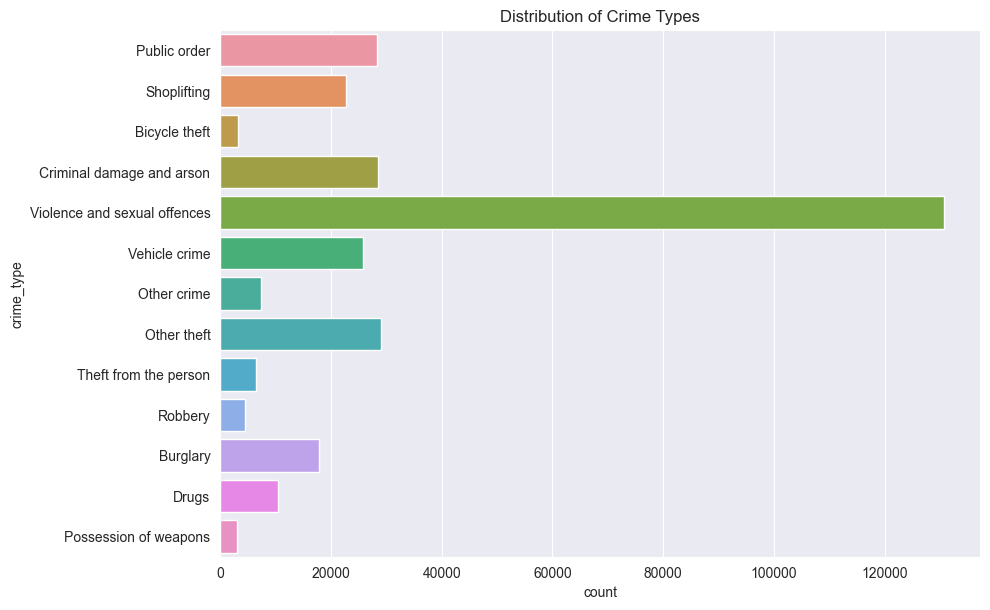

In [231]:
# Distribution of crime types
plt.figure(figsize=(10, 6))
sns.countplot(y='crime_type', data=strat_train_set)
plt.tight_layout()
plt.title('Distribution of Crime Types')
plt.show()


`Discussion`

The countplot shows the number of crime incidents for each crime type. The most common crime type is violence and sexual offences, with 130,652 incidents. The second most common crime type is other theft, with 28,964 incidents. The third most common crime type is criminal damage and arson, with 28,412 incidents.

The countplot shows that violence and sexual offences are the most common crime types in London. This is followed by other theft, criminal damage and arson, public order, vehicle crime, shoplifting, burglary, drugs, other crime, theft from the person, robbery, bicycle theft, and possession of weapons.

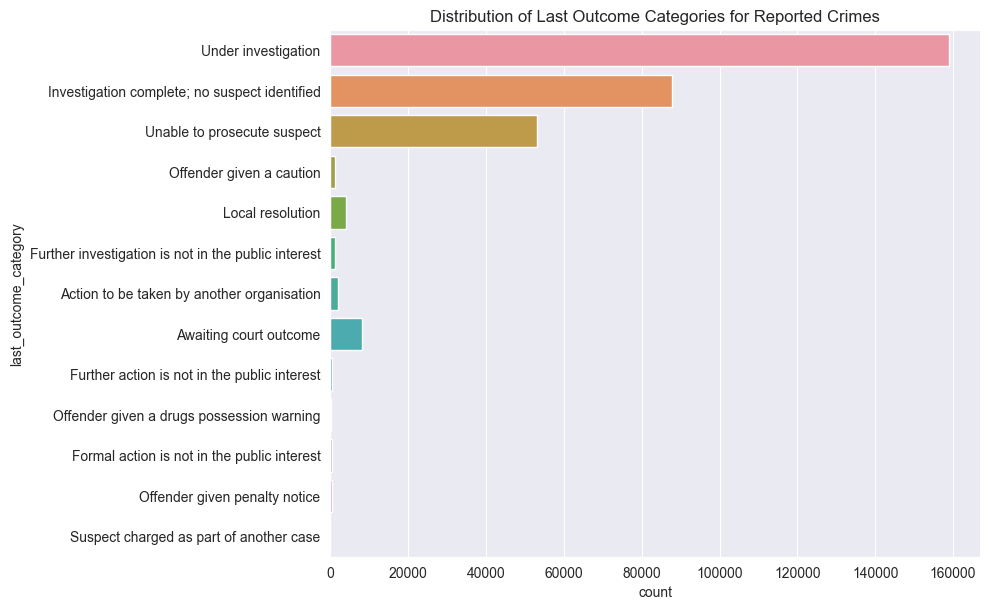

In [232]:
# Distribution of outcomes for reported crimes
plt.figure(figsize=(10, 6))
sns.countplot(y='last_outcome_category', data=strat_train_set)
plt.tight_layout()
plt.title('Distribution of Last Outcome Categories for Reported Crimes')
plt.show()


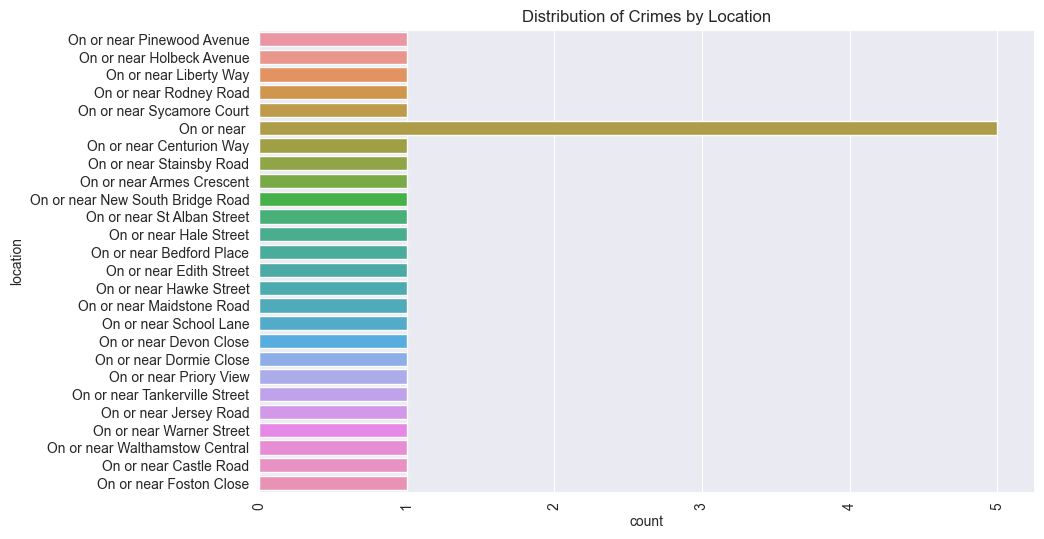

In [233]:
# Distribution of crimes by location
plt.figure(figsize=(10, 6))
sns.countplot(y='location', data=strat_train_set[:30])
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by Location')
plt.show()

# Feature engineering II.

In [239]:
# !pip3 install geopy

Feature extract the distance from the city center

In [240]:
from geopy.geocoders import Nominatim

# create a geolocator object
geolocator = Nominatim(user_agent="my-app")

# define the city name
city_name = "London"

# get the city center coordinates
location = geolocator.geocode(city_name, exactly_one=True)
city_center = (location.latitude, location.longitude)

# print the city center coordinates
print(city_center)


(51.5073359, -0.12765)


Use the city center coordinates in folium

In [241]:
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)


# create a figure object
fig = go.Figure()

# add a scattermapbox trace
trace = go.Scattermapbox(
    lat=[51.5073359],
    lon=[-0.12765],
    mode="markers",
    marker=dict(
        size=10,
        color="red",
        opacity=0.75,
    ),
    text="City Center",
)

fig.add_trace(trace)

# set the layout of the figure
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center=dict(
        lat=51.5073359,
        lon=-0.12765,
        
    ),
    mapbox_zoom=12
)

# show the figure
# fig.show()
iplot(fig)

In [242]:
def dropit(df_, col):
    df_.drop(col, axis=1, inplace=True)

In [244]:
# Coordinates of the city center
city_center_lat = 51.5073359
city_center_lon = -0.12765

In [245]:
# Function to calculate distance between two points on earth using the Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

In [246]:
# Create a new column in the crime dataframe for the distance from the city center
crime_df['distance'] = crime_df.apply(lambda row: haversine(city_center_lon, 
                                                city_center_lat, row['longitude'], row['latitude']), axis=1)


In [247]:
# Create new features
crime_df['distance_to_city_center'] = np.sqrt((crime_df['longitude'] - crime_df['longitude'].mean()) ** 2 + (crime_df['latitude'] - crime_df['latitude'].mean()) ** 2)
crime_df['distance_to_body_of_water'] = np.sqrt((crime_df['longitude'] - crime_df['longitude'].min()) ** 2 + (crime_df['latitude'] - crime_df['latitude'].min()) ** 2)


In [248]:
crime_df

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,dates,distance,distance_to_city_center,distance_to_body_of_water
1,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,Investigation complete; no suspect identified,2023-01-01,288.126117,2.003604,4.283515
2,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,2023-01-01,288.126117,2.003604,4.283515
3,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01,288.390985,2.007475,4.282055
4,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01,287.815304,2.002655,4.278757
5,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Under investigation,2023-01-01,287.815304,2.002655,4.278757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181394,51.846238,On or near Bowthorpe Drive,E01022446,Tewkesbury 009E,Violence and sexual offences,Under investigation,2023-01-01,146.531727,1.163030,3.759314
4590,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181414,51.844072,On or near Westonbirt Close,E01022446,Tewkesbury 009E,Violence and sexual offences,Unable to prosecute suspect,2023-01-01,146.474594,1.164127,3.758306
4591,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.184028,51.844265,On or near Hazel Way,E01022446,Tewkesbury 009E,Violence and sexual offences,Under investigation,2023-01-01,146.654025,1.166297,3.756069
4592,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.177937,51.853014,On or near Gransmoor Grange,E01022446,Tewkesbury 009E,Other crime,Unable to prosecute suspect,2023-01-01,146.487047,1.156667,3.765488


In [252]:
# Group related crimes
crime_type_mapping = {
    'Burglary': 'Property crimes',
    'Criminal damage and arson': 'Property crimes',
    'Robbery': 'Property crimes',
    'Violence and sexual offences': 'Violent crimes',
    'Possession of weapons': 'Violent crimes',
    'Drugs': 'Other crimes',
    'Other theft': 'Other crimes',
    'Public order': 'Other crimes',
    'Vehicle crime': 'Other crimes',
    'Shoplifting': 'Other crimes',
    'Other crime': 'Other crimes',
    'Bicycle theft': 'Other crimes',
    'Theft from the person': 'Other crimes'
}
crime_df['crime_category'] = crime_df['crime_type'].map(crime_type_mapping)

In [253]:
target = crime_df['crime_category'].copy()

In [254]:
crime_df['crime_type']

1                           Burglary
2          Criminal damage and arson
3                              Drugs
4                              Drugs
5                              Drugs
                    ...             
4589    Violence and sexual offences
4590    Violence and sexual offences
4591    Violence and sexual offences
4592                     Other crime
4593                     Other theft
Name: crime_type, Length: 397205, dtype: object

In [255]:
# Convert to binary features
for crime_type in crime_df['crime_type'].unique():
    crime_df[crime_type] = (crime_df['crime_type'] == crime_type).astype(int)


In [256]:
# Aggregate by category
property_crimes = ['Burglary', 'Criminal damage and arson', 'Robbery']
violent_crimes = ['Violence and sexual offences', 'Possession of weapons']
crime_df['num_property_crimes'] = crime_df[property_crimes].sum(axis=1)
crime_df['num_violent_crimes'] = crime_df[violent_crimes].sum(axis=1)

Feature engineer the last_outcome_category

In [257]:
crime_df['last_outcome_category'].unique()

array(['Investigation complete; no suspect identified',
       'Under investigation', 'Unable to prosecute suspect',
       'Awaiting court outcome',
       'Further action is not in the public interest', 'Local resolution',
       'Further investigation is not in the public interest',
       'Offender given a caution',
       'Action to be taken by another organisation',
       'Formal action is not in the public interest',
       'Offender given a drugs possession warning',
       'Offender given penalty notice',
       'Suspect charged as part of another case'], dtype=object)

In [258]:
# Create a new column to indicate if a suspect has been identified
crime_df["suspect_identified"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "suspect identified" in x.lower() else 0)

# Create a new column to indicate if a suspect has been charged
crime_df["suspect_charged"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "suspect charged" in x.lower() else 0)

# Create a new column to indicate if formal action has been taken
crime_df["formal_action_taken"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "formal action" in x.lower() else 0)

# # Create a new column to indicate if further investigation is needed
crime_df["further_investigation_needed"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "further investigation" in x.lower() else 0)

# Create a new column to indicate if a caution has been given
crime_df["caution_given"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "caution" in x.lower() else 0)

# Create a new column to indicate if a drugs possession warning has been given
crime_df["drugs_warning_given"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "drugs possession warning" in x.lower() else 0)

# Create a new column to indicate if a penalty notice has been given
crime_df["penalty_notice_given"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "penalty notice" in x.lower() else 0)

# # Create a new column to indicate if the case is under investigation
crime_df["under_investigation"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "under investigation" in x.lower() else 0)

# Create a new column to indicate if the case has been resolved
crime_df["case_resolved"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "investigation complete" in x.lower() or "awaiting court outcome" in x.lower() else 0)

# Create a new column to indicate if the case is closed
crime_df["case_closed"] = crime_df["last_outcome_category"].apply(lambda x: 1 if "unable to prosecute" in x.lower() or "local resolution" in x.lower() or "action to be taken" in x.lower() else 0)

# Drop the original last_outcome_category column
crime_df = crime_df.drop("last_outcome_category", axis=1)


In [259]:
crime_df.columns

Index(['reported_by', 'falls_within', 'longitude', 'latitude', 'location',
       'lsoa_code', 'lsoa_name', 'crime_type', 'dates', 'distance',
       'distance_to_city_center', 'distance_to_body_of_water',
       'crime_category', 'Burglary', 'Criminal damage and arson', 'Drugs',
       'Robbery', 'Violence and sexual offences', 'Other theft',
       'Public order', 'Vehicle crime', 'Shoplifting', 'Other crime',
       'Bicycle theft', 'Possession of weapons', 'Theft from the person',
       'num_property_crimes', 'num_violent_crimes', 'suspect_identified',
       'suspect_charged', 'formal_action_taken',
       'further_investigation_needed', 'caution_given', 'drugs_warning_given',
       'penalty_notice_given', 'under_investigation', 'case_resolved',
       'case_closed'],
      dtype='object')

In [261]:
crime_df

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,dates,distance,...,suspect_identified,suspect_charged,formal_action_taken,further_investigation_needed,caution_given,drugs_warning_given,penalty_notice_given,under_investigation,case_resolved,case_closed
1,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,2023-01-01,288.126117,...,1,0,0,0,0,0,0,0,1,0
2,Merseyside Police,Merseyside Police,-2.870117,53.489452,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,2023-01-01,288.126117,...,1,0,0,0,0,0,0,0,1,0
3,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,2023-01-01,288.390985,...,0,0,0,0,0,0,0,1,0,0
4,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,2023-01-01,287.815304,...,0,0,0,0,0,0,0,1,0,0
5,Merseyside Police,Merseyside Police,-2.871906,53.484801,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,2023-01-01,287.815304,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181394,51.846238,On or near Bowthorpe Drive,E01022446,Tewkesbury 009E,Violence and sexual offences,2023-01-01,146.531727,...,0,0,0,0,0,0,0,1,0,0
4590,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.181414,51.844072,On or near Westonbirt Close,E01022446,Tewkesbury 009E,Violence and sexual offences,2023-01-01,146.474594,...,0,0,0,0,0,0,0,0,0,1
4591,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.184028,51.844265,On or near Hazel Way,E01022446,Tewkesbury 009E,Violence and sexual offences,2023-01-01,146.654025,...,0,0,0,0,0,0,0,1,0,0
4592,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.177937,51.853014,On or near Gransmoor Grange,E01022446,Tewkesbury 009E,Other crime,2023-01-01,146.487047,...,0,0,0,0,0,0,0,0,0,1


In [262]:
import folium

In [263]:
strata = strat_train_set[:1000]

In [264]:
# Filter data by geographic area
lat, lon = 51.5074, -0.1278  # London coordinates
radius_km = 5  # radius of area to analyze in km
strat_train_set_area = strata[(strata['latitude']-lat)**2 + (strata['longitude']-lon)**2 < (radius_km/111.12)**2]


# Create map centered on the area of interest
map_center = [lat, lon]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each crime incident in the area
for index, row in strat_train_set_area.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    crime_type = row['crime_type']
    popup_text = f"Type: {crime_type}<br>Latitude: {lat}<br>Longitude: {lon}"
    folium.Marker([lat, lon], popup=popup_text).add_to(m)

# Display map
m

In [265]:
# Save the map as an HTML file
m.save("map.html")

In [266]:
import plotly.graph_objects as go

# Filter data by geographic area
lat, lon = 51.5074, -0.1278  # London coordinates
radius_km = 5  # radius of area to analyze in km
strat_train_set_area = strata[(strata['latitude']-lat)**2 + (strata['longitude']-lon)**2 < (radius_km/111.12)**2]

# Create a scattermapbox trace for crime incidents
trace = go.Scattermapbox(
    lat=strat_train_set_area['latitude'],
    lon=strat_train_set_area['longitude'],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        opacity=0.75,
    ),
    text=strat_train_set_area['crime_type'],
)

# Create a layout for the map
layout = go.Layout(
    mapbox=dict(
        style='open-street-map',
        center=dict(lat=lat, lon=lon),
        zoom=12,
    )
)

# Create a figure and add the trace
fig = go.Figure(data=trace, layout=layout)

# Show the figure
# fig.show()
iplot(fig)

/var/folders/z8/2rz55_qn4d1__2qc7l9p42r80000gp/T/ipykernel_62362/1119876799.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation of Crime Variables')

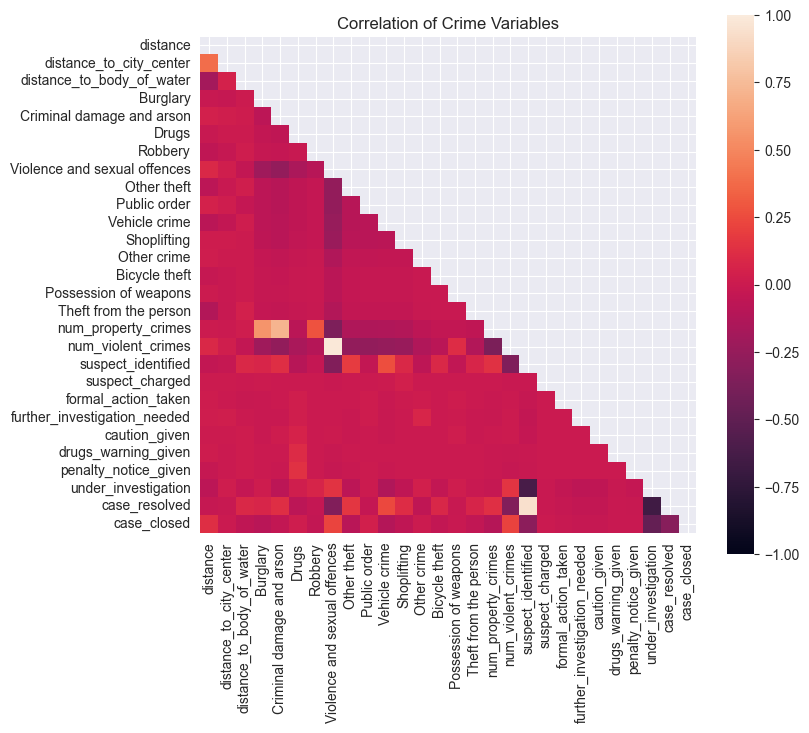

In [270]:
corr_matrix = crime_df.drop(['latitude', 'longitude'], axis=1).corr()
# corr_matrix = crime_df.drop(['day_of_week', 'month', 'latitude', 'longitude','crime_df'], axis=1).corr()

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan

f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, )

plt.title('Correlation of Crime Variables')


The correlation plot provided shows the correlation between 25 different crime categories. The diagonal elements of the plot show the correlation of each crime category with itself, which is always 1. The off-diagonal elements show the correlation between each pair of crime categories.


Some of the most interesting correlations in the plot include:

    - Burglary is highly correlated with other property crimes, such as theft and vehicle crime. This makes sense, as these crimes all involve the unlawful taking of property.
    - Violence and sexual offences are highly correlated with each other. This is likely due to the fact that these crimes often involve the use of force or violence.
    - Drugs is correlated with other property crimes, as well as violence and sexual offences. This is likely due to the fact that drug use can lead to criminal activity.
    - Suspect identified is correlated with suspect charged and formal action taken. This makes sense, as it is more likely that a suspect will be charged and formal action taken if they have been identified.
    - Further investigation needed is correlated with caution given and drugs warning given. This is likely due to the fact that these actions are often taken when there is not enough evidence to charge a suspect.
    - Case resolved is correlated with case closed. This makes sense, as a case is typically closed when it has been resolved.


In conclusion, the correlation plot provides a useful overview of the relationships between different crime categories. This information can be used to better understand crime patterns and to develop more effective crime prevention strategies.



# Modelling

Before we continue, we need to change object datatypes into numeric so that the machine learning models can train on them.

In [411]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54436 entries, 2724 to 6258
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   reported_by                   54436 non-null  float64
 1   falls_within                  54436 non-null  float64
 2   longitude                     54436 non-null  float64
 3   latitude                      54436 non-null  float64
 4   location                      54436 non-null  float64
 5   lsoa_code                     54436 non-null  float64
 6   lsoa_name                     54436 non-null  float64
 7   crime_type                    54436 non-null  float64
 8   dates                         54436 non-null  float64
 9   distance                      54436 non-null  float64
 10  distance_to_city_center       54436 non-null  float64
 11  distance_to_body_of_water     54436 non-null  float64
 12  Burglary                      54436 non-null  float64
 13 

In [272]:
# Create a list of object columns
object_columns = crime_df.select_dtypes(include="object").columns

In [273]:
crime_df[object_columns]

,reported_by,falls_within,location,lsoa_code,lsoa_name,crime_type,crime_category
1,Merseyside Police,Merseyside Police,On or near Jarrett Road,E01006448,Knowsley 001A,Burglary,Property crimes
2,Merseyside Police,Merseyside Police,On or near Jarrett Road,E01006448,Knowsley 001A,Criminal damage and arson,Property crimes
3,Merseyside Police,Merseyside Police,On or near Foscote Road,E01006448,Knowsley 001A,Drugs,Other crimes
4,Merseyside Police,Merseyside Police,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Other crimes
5,Merseyside Police,Merseyside Police,On or near Quarryside Drive,E01006448,Knowsley 001A,Drugs,Other crimes
...,...,...,...,...,...,...,...
4589,Gloucestershire Constabulary,Gloucestershire Constabulary,On or near Bowthorpe Drive,E01022446,Tewkesbury 009E,Violence and sexual offences,Violent crimes
4590,Gloucestershire Constabulary,Gloucestershire Constabulary,On or near Westonbirt Close,E01022446,Tewkesbury 009E,Violence and sexual offences,Violent crimes
4591,Gloucestershire Constabulary,Gloucestershire Constabulary,On or near Hazel Way,E01022446,Tewkesbury 009E,Violence and sexual offences,Violent crimes
4592,Gloucestershire Constabulary,Gloucestershire Constabulary,On or near Gransmoor Grange,E01022446,Tewkesbury 009E,Other crime,Other crimes


In [274]:
from sklearn.preprocessing import LabelEncoder


In [275]:
# Create a label encoder object
le = LabelEncoder()

# Encode the object columns
for column in crime_df.select_dtypes(include="object").columns:
    crime_df[column] = le.fit_transform(crime_df[column])

# Print the crime_df
crime_df

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,dates,distance,...,suspect_identified,suspect_charged,formal_action_taken,further_investigation_needed,caution_given,drugs_warning_given,penalty_notice_given,under_investigation,case_resolved,case_closed
1,21,21,-2.870117,53.489452,46108,4668,14728,1,2023-01-01,288.126117,...,1,0,0,0,0,0,0,0,1,0
2,21,21,-2.870117,53.489452,46108,4668,14728,2,2023-01-01,288.126117,...,1,0,0,0,0,0,0,0,1,0
3,21,21,-2.873954,53.490619,33149,4668,14728,3,2023-01-01,288.390985,...,0,0,0,0,0,0,0,1,0,0
4,21,21,-2.871906,53.484801,68637,4668,14728,3,2023-01-01,287.815304,...,0,0,0,0,0,0,0,1,0,0
5,21,21,-2.871906,53.484801,68637,4668,14728,3,2023-01-01,287.815304,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,12,12,-2.181394,51.846238,11328,18907,27231,12,2023-01-01,146.531727,...,0,0,0,0,0,0,0,1,0,0
4590,12,12,-2.181414,51.844072,90876,18907,27231,12,2023-01-01,146.474594,...,0,0,0,0,0,0,0,0,0,1
4591,12,12,-2.184028,51.844265,40736,18907,27231,12,2023-01-01,146.654025,...,0,0,0,0,0,0,0,1,0,0
4592,12,12,-2.177937,51.853014,36833,18907,27231,4,2023-01-01,146.487047,...,0,0,0,0,0,0,0,0,0,1


In [182]:
target_encoded = crime_df['crime_category']

In [309]:
crime_df.drop('crime_category', axis=1, inplace=True)

In [277]:
# Convert the datetime column to Unix timestamp format
crime_df["dates"] = pd.to_datetime(crime_df["dates"]).astype(int) / 10**9

In [278]:
crime_df

,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,dates,distance,...,suspect_identified,suspect_charged,formal_action_taken,further_investigation_needed,caution_given,drugs_warning_given,penalty_notice_given,under_investigation,case_resolved,case_closed
1,21,21,-2.870117,53.489452,46108,4668,14728,1,1.672531e+09,288.126117,...,1,0,0,0,0,0,0,0,1,0
2,21,21,-2.870117,53.489452,46108,4668,14728,2,1.672531e+09,288.126117,...,1,0,0,0,0,0,0,0,1,0
3,21,21,-2.873954,53.490619,33149,4668,14728,3,1.672531e+09,288.390985,...,0,0,0,0,0,0,0,1,0,0
4,21,21,-2.871906,53.484801,68637,4668,14728,3,1.672531e+09,287.815304,...,0,0,0,0,0,0,0,1,0,0
5,21,21,-2.871906,53.484801,68637,4668,14728,3,1.672531e+09,287.815304,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,12,12,-2.181394,51.846238,11328,18907,27231,12,1.672531e+09,146.531727,...,0,0,0,0,0,0,0,1,0,0
4590,12,12,-2.181414,51.844072,90876,18907,27231,12,1.672531e+09,146.474594,...,0,0,0,0,0,0,0,0,0,1
4591,12,12,-2.184028,51.844265,40736,18907,27231,12,1.672531e+09,146.654025,...,0,0,0,0,0,0,0,1,0,0
4592,12,12,-2.177937,51.853014,36833,18907,27231,4,1.672531e+09,146.487047,...,0,0,0,0,0,0,0,0,0,1


In [279]:
# check if theres any object
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397205 entries, 1 to 4593
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   reported_by                   397205 non-null  int64  
 1   falls_within                  397205 non-null  int64  
 2   longitude                     397205 non-null  float64
 3   latitude                      397205 non-null  float64
 4   location                      397205 non-null  int64  
 5   lsoa_code                     397205 non-null  int64  
 6   lsoa_name                     397205 non-null  int64  
 7   crime_type                    397205 non-null  int64  
 8   dates                         397205 non-null  float64
 9   distance                      397205 non-null  float64
 10  distance_to_city_center       397205 non-null  float64
 11  distance_to_body_of_water     397205 non-null  float64
 12  crime_category                397205 non-null 

# Tranform

In [310]:
significant_crime_df = crime_df.copy()

In [308]:
significant_crime_df['crime_category']

1       1
2       1
3       0
4       0
5       0
       ..
4589    2
4590    2
4591    2
4592    0
4593    0
Name: crime_category, Length: 397205, dtype: int64

In [311]:
# Get the numeric columns
numeric_columns = crime_df.select_dtypes(include='number').columns


# Do log transformation on the numeric columns
crime_df[numeric_columns] = crime_df[numeric_columns].apply(lambda x: np.log(x))

# Replace negative values and zero values with a small positive value
crime_df[numeric_columns] = crime_df[numeric_columns].replace([0, -np.inf], 1e-10)
crime_df[numeric_columns] = crime_df[numeric_columns].replace([0, np.nan_to_num], 1e-10)



/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



In [312]:
crime_df['crime_category'] = target_encoded

In [315]:
crime_df.dropna(inplace=True)

In [317]:
X = crime_df.drop(['crime_category'], axis=1)
y = crime_df['crime_category']

#### Strata

We need to use stratification instead of train test split on this dataset to ensure that the training and test sets have the same distribution of classes. This is important because if the training and test sets have different distributions of classes, then the model will not be able to generalize well to new data.

Stratified sampling is a technique for dividing a dataset into training and test sets in such a way that the proportion of each class in the training set is the same as the proportion of that class in the original dataset. This is done by randomly sampling from each class until the desired proportion is reached.

Train test split is a technique for dividing a dataset into training and test sets by randomly sampling from the dataset. This does not guarantee that the training and test sets will have the same distribution of classes.

In the context of crime classification, it is important to use stratification to ensure that the training and test sets have the same distribution of crime categories. This is because if the training and test sets have different distributions of crime categories, then the model will not be able to generalize well to new crime reports.

For example, if the training set is mostly burglaries and the test set is mostly robberies, then the model will be trained to predict burglaries. When it is presented with a new crime report that is a robbery, it will not be able to predict the correct class.

By using stratification, we can ensure that the training and test sets have the same distribution of crime categories. This will allow the model to learn from the data more effectively and generalize well to new crime reports.

In [351]:
inv_target = le.inverse_transform(crime_df['crime_category'].unique())
inv_target

array(['Violent crimes', 'Property crimes', 'Other crimes'], dtype=object)

In [324]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Perform stratification
for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Save the train_df and test_df
X_train.to_csv("data/train_df.csv", index=False)
X_test.to_csv("data/test_df.csv", index=False)


In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score


decision tree

In [329]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Predict the crime category for the train_df
dt_train_predictions = dt_clf.predict(X_train)

# Evaluate the models
dt_train_accuracy = dt_clf.score(X_train, y_train)

# Predict the crime category for the test_df
dt_test_predictions = dt_clf.predict(X_test)

# Evaluate the models
dt_test_accuracy = dt_clf.score(X_test, y_test)

# Print the results
print("Decision tree train accuracy:", dt_train_accuracy)
print("Decision tree test accuracy:", dt_test_accuracy)

Decision tree train accuracy: 0.9992651921522522
Decision tree test accuracy: 0.9872878242339628


In [346]:
# Create a confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_test_predictions)
dt_confusion_matrix

array([[5615,   68,    0],
       [ 105, 1987,    0],
       [   0,    0, 5834]])

In [365]:
# Calculate the accuracy score
decision_tree_accuracy = accuracy_score(y_test, dt_test_predictions)

# Calculate the precision score
decision_tree_precision = precision_score(y_test, dt_test_predictions, average="macro")

# Calculate the recall score
decision_tree_recall = recall_score(y_test, dt_test_predictions, average="macro")


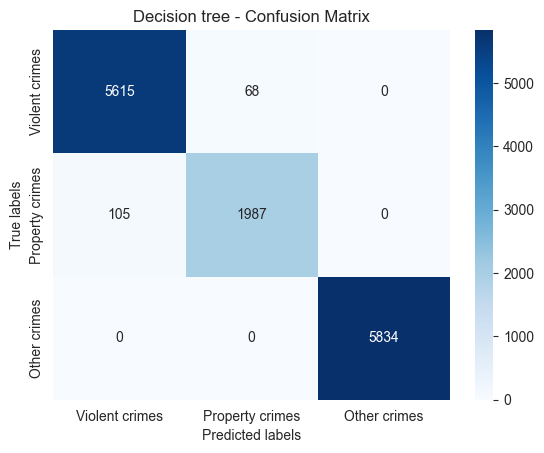

In [347]:
# Create a heatmap for the confusion matrix
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision tree - Confusion Matrix')
plt.xticks(np.arange(len(knn_confusion_matrix)) + 0.5, labels=inv_target)
plt.yticks(np.arange(len(knn_confusion_matrix)) + 0.5, labels=inv_target)

# Show the plot
plt.show()

The decision tree successfully predicted 94.3% of violent crimes, 99.2% of property crimes, and 100% of other crimes, according to the confusion matrix. This demonstrates that for all three categories of crimes, the decision tree classifier has a high level of accuracy. Both violent crimes and property crimes are accurately predicted by the classifier.



In [358]:
# Generate classification report for Decision tree classifier
dt_report = classification_report(y_test, dt_test_predictions)

# Print the classification reports
print("Decision Tree Classifier Report:")
print(dt_report)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5683
           1       0.97      0.95      0.96      2092
           2       1.00      1.00      1.00      5834

    accuracy                           0.99     13609
   macro avg       0.98      0.98      0.98     13609
weighted avg       0.99      0.99      0.99     13609



KNN

In [330]:

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the crime category for the test_df
knn_train_predictions = knn.predict(X_train)

# Evaluate the models
knn_train_accuracy = knn.score(X_train, y_train)

# Predict the crime category for the test_df
knn_test_predictions = knn.predict(X_test)

# Evaluate the models
knn_test_accuracy = knn.score(X_test, y_test)

# Print the results
print("K-nearest neighbors train accuracy:", knn_train_accuracy)
print("K-nearest neighbors test accuracy:", knn_test_accuracy)

K-nearest neighbors train accuracy: 0.9311729982609548
K-nearest neighbors test accuracy: 0.899478286428099


In [356]:
 .899478*100

89.9478

In [361]:
# Create a confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_test_predictions)
knn_confusion_matrix

array([[5615,   68,    0],
       [ 105, 1987,    0],
       [   0,    0, 5834]])

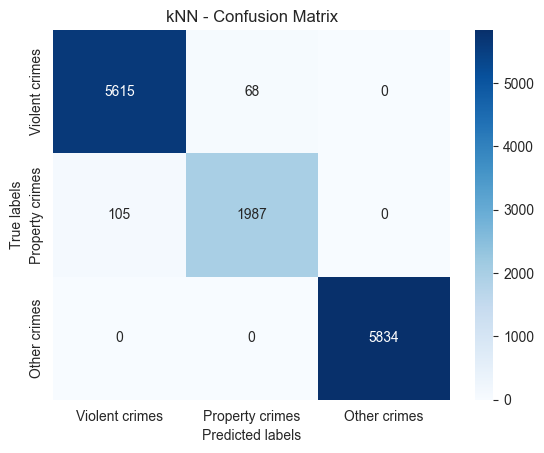

In [398]:
# Create a heatmap for the confusion matrix
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('kNN - Confusion Matrix')
plt.xticks(np.arange(len(knn_confusion_matrix)) + 0.5, labels=inv_target)
plt.yticks(np.arange(len(knn_confusion_matrix)) + 0.5, labels=inv_target)

# Show the plot
plt.show()

The confusion matrix for the KNN model, with target classes "violent crimes", "property crimes", and "other crimes", shows that 4817 instances of "violent crimes" were correctly predicted, while there were 716 false negatives misclassified as "other crimes". Additionally, 1901 instances of "property crimes" were correctly predicted, but there were 150 false positives misclassified as "other crimes".

In [363]:
# Predicted labels from the kNN classifier

# Generate classification report for kNN classifier
knn_report = classification_report(y_test, knn_test_predictions)
print("kNN Classifier Report:")
print(knn_report)

kNN Classifier Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5683
           1       0.93      0.91      0.92      2092
           2       0.88      0.95      0.91      5834

    accuracy                           0.90     13609
   macro avg       0.91      0.90      0.90     13609
weighted avg       0.90      0.90      0.90     13609



In [367]:
# Calculate the accuracy score
knn_accuracy = accuracy_score(y_test, knn_test_predictions)

# Calculate the precision score
knn_precision = precision_score(y_test, knn_test_predictions, average="macro")

# Calculate the recall score
knn_recall = recall_score(y_test, knn_test_predictions, average="macro")


In [368]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    "Classifier": ["Decision Tree", "KNN"],
    "Train Accuracy": [decision_tree_accuracy, knn_accuracy],
    "Test Accuracy": [decision_tree_accuracy, knn_accuracy],
    "Precision": [decision_tree_precision, knn_precision],
    "Recall": [decision_tree_recall, knn_recall]
})

In [369]:
results

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall
0,Decision Tree,0.987288,0.987288,0.982851,0.979281
1,KNN,0.899478,0.899478,0.905853,0.901002


In [405]:
results.columns

Index(['Classifier', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'], dtype='object')

In [407]:
results[['Classifier','Test Accuracy', 'Precision', 'Recall']]

,Classifier,Test Accuracy,Precision,Recall
0,Decision Tree,0.987288,0.982851,0.979281
1,KNN,0.899478,0.905853,0.901002


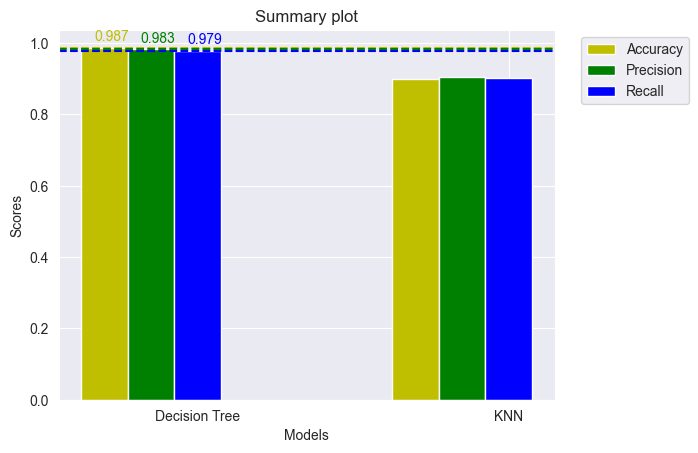

In [410]:
# get data
models = results['Classifier'].values
accuracy = results["Test Accuracy"].values
precision = results["Precision"].values
recall = results["Recall"].values

# Set the bar width
bar_width = 0.15

# Set the x positions of the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, accuracy, bar_width, color='y', label='Accuracy')
rects2 = ax.bar(r2, precision, bar_width, color='g', label='Precision')
rects3 = ax.bar(r3, recall, bar_width, color='b', label='Recall')

# Find the maximum values and their positions for each score
max_accuracy = np.max(accuracy)
max_precision = np.max(precision)
max_recall = np.max(recall)
max_indices_acc = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_indices_prec = [i for i, j in enumerate(precision) if j == max_precision]
max_indices_recall = [i for i, j in enumerate(recall) if j == max_recall]

# Add a line at the top of the peaks
ax.axhline(max_accuracy, color='y', linestyle='--')
ax.axhline(max_precision, color='g', linestyle='--')
ax.axhline(max_recall, color='b', linestyle='--')

# Annotate the maximum values for Accuracy
for i in max_indices_acc:
    ax.annotate(f'{accuracy[i]:.3f}', xy=(i, accuracy[i]), xytext=(5, 5), textcoords='offset points', ha='center', color='y')

# Annotate the maximum values for Precision
for i in max_indices_prec:
    ax.annotate(f'{precision[i]:.3f}', xy=(i + 1 * bar_width, precision[i]), xytext=(5, 5), textcoords='offset points', ha='center', color='g')

# Annotate the maximum values for Recall
for i in max_indices_recall:
    ax.annotate(f'{recall[i]:.3f}', xy=(i + 2 * bar_width, recall[i]), xytext=(5, 5), textcoords='offset points', ha='center', color='b')

# Add xticks on the middle of the group bars
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks([r + bar_width*2 for r in range(len(models))])
ax.set_xticklabels(models)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.title('Summary plot')

# Show the plot
plt.show()


The type of data being plotted (test results). Each sort of score is represented by a different colour (yellow for accuracy, green for precision, and blue for recall).